# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt     


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['rikitea',
 'huron',
 'carolina',
 'westport',
 'dire dawa',
 'hithadhoo',
 'vaitupu',
 'butaritari',
 'severnyy',
 'tasbuget',
 'boshnyakovo',
 'hermanus',
 'bethel',
 'iqaluit',
 'kodiak',
 'saint-philippe',
 'sosua',
 'pevek',
 'yellowknife',
 'abu samrah',
 'carnarvon',
 'ushuaia',
 'cape town',
 'puerto ayora',
 'acari',
 'prince rupert',
 'sur',
 'new norfolk',
 'illoqqortoormiut',
 'esparta',
 'olivet',
 'busselton',
 'taolanaro',
 'zaragoza',
 'kiruna',
 'ribeira grande',
 'sayyan',
 'copiapo',
 'mataura',
 'bathsheba',
 'punta arenas',
 'guerrero negro',
 'hokitika',
 'bolungarvik',
 'aklavik',
 'kapaa',
 'fortuna',
 'luderitz',
 'mogadishu',
 'banda aceh',
 'belushya guba',
 'bredasdorp',
 'airai',
 'dandong',
 'clyde river',
 'mul',
 'khasan',
 'mar del plata',
 'jamestown',
 'khatanga',
 'bonavista',
 'hilo',
 'ponta do sol',
 'coihaique',
 'lebu',
 'alofi',
 'lengerich',
 'bashtanka',
 'qaanaaq',
 'louisbourg',
 'bargal',
 'lashio',
 'moville',
 'berlevag',
 'vaini',
 'kh

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
counter = 0


for city in cities:
    print("--------------")
    print(f' Processing request of the city {city}') 
    url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')
    weather_response = requests.get(url)
    weather_json = weather_response.json()

    try:
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
    except:
        print("city not found. skipping...")
        cloudiness.append('NaN')
        country.append('NaN')
        date.append('NaN')
        humidity.append('NaN')
        lat.append('NaN')
        lng.append('NaN')
        max_temp.append('NaN')
        wind_speed.append('NaN')

--------------
 Processing request of the city rikitea
--------------
 Processing request of the city huron
--------------
 Processing request of the city carolina
--------------
 Processing request of the city westport
--------------
 Processing request of the city dire dawa
--------------
 Processing request of the city hithadhoo
--------------
 Processing request of the city vaitupu
city not found. skipping...
--------------
 Processing request of the city butaritari
--------------
 Processing request of the city severnyy
--------------
 Processing request of the city tasbuget
city not found. skipping...
--------------
 Processing request of the city boshnyakovo
--------------
 Processing request of the city hermanus
--------------
 Processing request of the city bethel
--------------
 Processing request of the city iqaluit
--------------
 Processing request of the city kodiak
--------------
 Processing request of the city saint-philippe
--------------
 Processing request of the cit

--------------
 Processing request of the city bambanglipuro
--------------
 Processing request of the city brae
--------------
 Processing request of the city santa rosa
--------------
 Processing request of the city ahipara
--------------
 Processing request of the city el tarra
--------------
 Processing request of the city caravelas
--------------
 Processing request of the city cabo san lucas
--------------
 Processing request of the city tamiahua
--------------
 Processing request of the city vila velha
--------------
 Processing request of the city walker
--------------
 Processing request of the city touba
--------------
 Processing request of the city tagusao
--------------
 Processing request of the city muros
--------------
 Processing request of the city dunedin
--------------
 Processing request of the city marsa matruh
--------------
 Processing request of the city ancud
--------------
 Processing request of the city lompoc
--------------
 Processing request of the city h

--------------
 Processing request of the city kimbe
--------------
 Processing request of the city codrington
--------------
 Processing request of the city alexandria
--------------
 Processing request of the city hamilton
--------------
 Processing request of the city steamboat springs
--------------
 Processing request of the city faanui
--------------
 Processing request of the city boljarovo
city not found. skipping...
--------------
 Processing request of the city pangnirtung
--------------
 Processing request of the city itarema
--------------
 Processing request of the city eufaula
--------------
 Processing request of the city gallup
--------------
 Processing request of the city antsohihy
--------------
 Processing request of the city shelburne
--------------
 Processing request of the city praia da vitoria
--------------
 Processing request of the city jalu
--------------
 Processing request of the city roma
--------------
 Processing request of the city ballina
-----------

--------------
 Processing request of the city toliary
city not found. skipping...
--------------
 Processing request of the city aquiraz
--------------
 Processing request of the city antibes
--------------
 Processing request of the city ardakan
--------------
 Processing request of the city mirebalais
--------------
 Processing request of the city abha
--------------
 Processing request of the city coracora
--------------
 Processing request of the city chardara
--------------
 Processing request of the city bonthe
--------------
 Processing request of the city tuatapere
--------------
 Processing request of the city pedasi
--------------
 Processing request of the city adrar
--------------
 Processing request of the city walvis bay
--------------
 Processing request of the city chara
--------------
 Processing request of the city constitucion
--------------
 Processing request of the city birjand
--------------
 Processing request of the city popova
--------------
 Processing reque

--------------
 Processing request of the city mackay
--------------
 Processing request of the city pocone
--------------
 Processing request of the city trogir
--------------
 Processing request of the city fougamou
--------------
 Processing request of the city washington
--------------
 Processing request of the city bor
--------------
 Processing request of the city srednekolymsk
--------------
 Processing request of the city chaochou
city not found. skipping...
--------------
 Processing request of the city karamea
city not found. skipping...
--------------
 Processing request of the city ngunguru
--------------
 Processing request of the city lagonoy
--------------
 Processing request of the city kamenka
--------------
 Processing request of the city sand springs
--------------
 Processing request of the city iranshahr
--------------
 Processing request of the city ferme-neuve
--------------
 Processing request of the city ratnapura
--------------
 Processing request of the city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_check = pd.DataFrame({'City': cities, 'Cloudiness': cloudiness, 'Country': country, 'Date': date, 'Humidity': humidity, 'Latitude': lat, 'Longitude': lng, 'Max Temp': max_temp, 'Wind Speed': wind_speed})
weather_checkdf = weather_check[weather_check['Date'] != "NaN"]

weather_checkdf

weather_checknew = weather_checkdf.astype({'City': 'str', 'Cloudiness': 'float64', 'Country': 'str', 'Humidity': 'float64', 'Latitude': 'float64', 'Longitude': 'float64', 'Max Temp': 'float64', 'Wind Speed': 'float64'})

#weather_checknew['Date'] = pd.to_datetime(weather_checknew['Date'])

weather_checknew.to_csv("Output/WeatherCheck.csv", index=False, header=True)

In [28]:
weather_checknew.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,rikitea,78.0,PF,1586638912,74.0,-23.12,-134.97,77.04,1.34
1,huron,75.0,US,1586638912,37.0,41.15,-82.55,57.00,12.75
2,carolina,20.0,PR,1586638745,70.0,18.38,-65.96,88.00,16.11
3,westport,75.0,US,1586638878,22.0,41.14,-73.36,55.99,12.75
4,dire dawa,51.0,ET,1586638899,46.0,9.59,41.87,73.35,3.36
5,hithadhoo,0.0,MV,1586638914,65.0,-0.60,73.08,84.56,6.38
7,butaritari,95.0,KI,1586638750,76.0,3.07,172.79,83.98,13.35
8,severnyy,75.0,RU,1586638915,68.0,50.68,36.55,35.60,11.18
10,boshnyakovo,97.0,RU,1586638915,90.0,49.63,142.17,25.88,4.25
11,hermanus,100.0,ZA,1586638750,71.0,-34.42,19.23,69.01,11.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

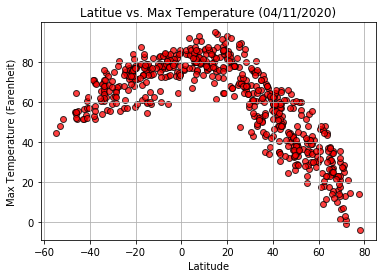

In [36]:
lat = weather_checknew['Latitude']
temp = weather_checknew['Max Temp']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(lat, temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Farenheit)')
plt.title(f'Latitue vs. Max Temperature ({date})')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

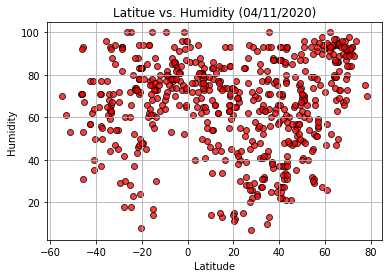

In [37]:
hum = weather_checknew['Humidity']

plt.scatter(lat, hum, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitue vs. Humidity ({date})')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

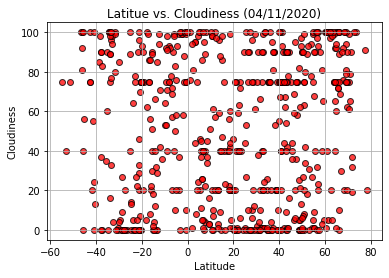

In [38]:
cloud = weather_checknew['Cloudiness']

plt.scatter(lat, cloud, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitue vs. Cloudiness ({date})')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

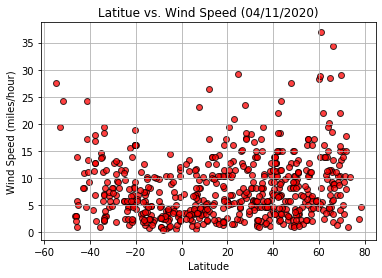

In [39]:
wind = weather_checknew['Wind Speed']

plt.scatter(lat, wind, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (miles/hour)')
plt.title(f'Latitue vs. Wind Speed ({date})')
plt.grid()
plt.show()

## Linear Regression

In [70]:
# OPTIONAL: Create a function to create Linear Regression plots
from scipy.stats import linregress

def plotregress(xvalues, yvalues):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    plt.plot(xvalues,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.annotate(line_eq,(0.25, 0.25), xytext='axes fraction',fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")

In [71]:
# Create Northern and Southern Hemisphere DataFrames
north_weather_data = weather_checknew[weather_checknew['Latitude'] > 0]
south_weather_data = weather_checknew[weather_checknew['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.813863441390893


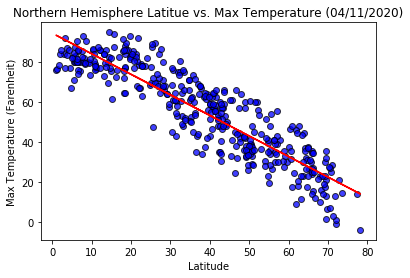

In [72]:
nlat = north_weather_data['Latitude']
ntemp = north_weather_data['Max Temp']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(nlat, ntemp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Farenheit)')
plt.title(f'Northern Hemisphere Latitue vs. Max Temperature ({date})')
plotregress(nlat, ntemp)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5025923270744524


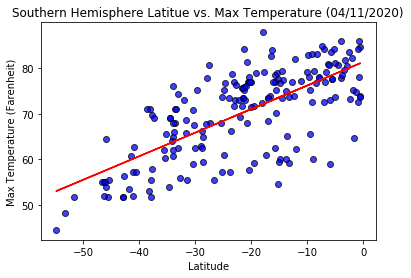

In [73]:
slat = south_weather_data['Latitude']
stemp = south_weather_data['Max Temp']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(slat, stemp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Farenheit)')
plt.title(f'Southern Hemisphere Latitue vs. Max Temperature ({date})')
plotregress(slat, stemp)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04677551437171817


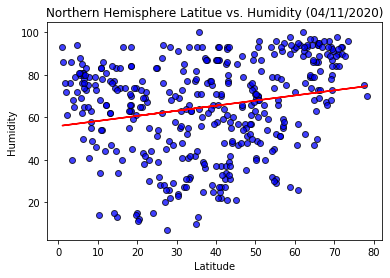

In [74]:
nhum = north_weather_data['Humidity']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(nlat, nhum, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere Latitue vs. Humidity ({date})')
plotregress(nlat, nhum)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06960879985054742


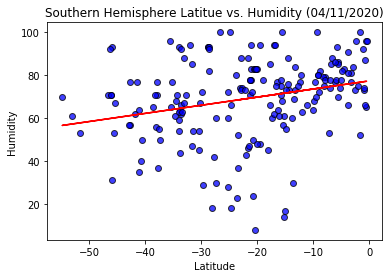

In [75]:
shum = south_weather_data['Humidity']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(slat, shum, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere Latitue vs. Humidity ({date})')
plotregress(slat, shum)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04981408368847123


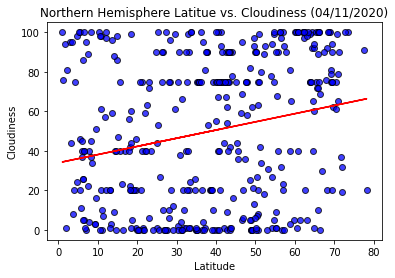

In [76]:
ncloud = north_weather_data['Cloudiness']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(nlat, ncloud, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere Latitue vs. Cloudiness ({date})')
plotregress(nlat, ncloud)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003906408095155916


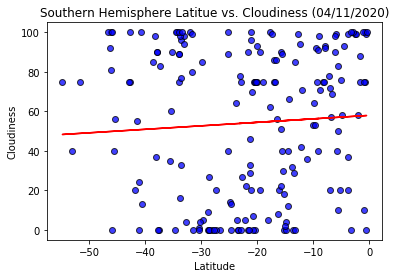

In [78]:
scloud = south_weather_data['Cloudiness']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(slat, scloud, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere Latitue vs. Cloudiness ({date})')
plotregress(slat, scloud)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.030712758877918783


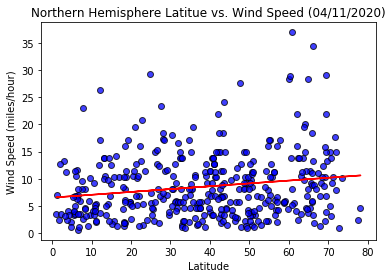

In [79]:
nlat = north_weather_data['Latitude']
nwind = north_weather_data['Wind Speed']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(nlat, nwind, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (miles/hour)')
plt.title(f'Northern Hemisphere Latitue vs. Wind Speed ({date})')
plotregress(nlat, nwind)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1584187133331406


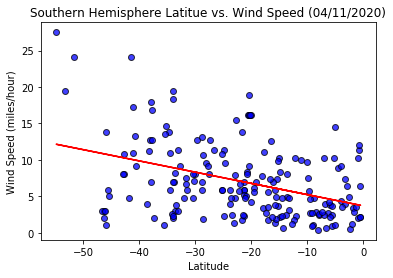

In [80]:
swind = south_weather_data['Wind Speed']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(slat, swind, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (miles/hour)')
plt.title(f'Southern Hemisphere Latitue vs. Wind Speed ({date})')
plotregress(slat, swind)
plt.show()